In [18]:
################################### UBER ASSIGNMENT ########################################
#*********************************Jagdish Mirchandani**************************************#
############################################################################################

In [1]:
# Import the numpy and pandas packages
import numpy as np
import pandas as pd
# import matplotlib & seaborn
import matplotlib.pyplot as plt
import seaborn as sns
# import datetime
import datetime as dt
%matplotlib inline

In [2]:
# Load the cvs file into a data frame
uber_df = pd.read_csv("F:/Uber Request Data.csv")
uber_df

########################################################   DATA CLEANING   ####################################################

###### inspect the data frame
# check the number of rows and columns
uber_df.shape

# check the data frame column wise 
uber_df.info() # On inspection , it can be noticed that Columns "Driver id" & "Drop timestamp" have Null Values

# Check for duplicates
uber_df.duplicated(subset = 'Request id').sum() #no duplicates found

# lets check how many null values are present for "Driver id"  & "Drop timestamp" columns
print("************************************ Details of the fields with null values below **************************************")
print("No. or rows where Driver id is null:", uber_df['Driver id'].isnull().sum())
print("No. of rows where Drop timestamp is null:",uber_df['Drop timestamp'].isnull().sum())

# Now Check if these null values are any how related with the trip status, lets group the dataframe on "Status"
uber_df.groupby('Status').count() 
# We can conclude 2 things after closely reviewing the results of the above statement 
# Conclusion # 1
# Notice carefully, number of null values we had for Driver id column = 2650. 
# this is because we have exactly 2650 rows "No Cars Available" as Status, since no cars were available, no driver id assigned.

#Conclusion # 2
# We had 3914 instances where Driver id was null ,which matches exactly with the no. of requests where status is "Cancelled" 
# OR the status is "No Cars Available", sum of these two is 1264 + 2650 = 3914 

# This is pretty much evident now we can not drop any of these columns or rows with null values, because this is what 
# we need to analyse, why so many cancellation happend and why so many occurence where cars were not available.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB
************************************ Details of the fields with null values below **************************************
No. or rows where Driver id is null: 2650
No. of rows where Drop timestamp is null: 3914


,Request id,Pickup point,Driver id,Request timestamp,Drop timestamp
Status,,,,,
Cancelled,1264,1264,1264,1264,0
No Cars Available,2650,2650,0,2650,0
Trip Completed,2831,2831,2831,2831,2831


In [3]:
################################## Derived fields which would help us in further analysis #######################################

# format "Request timestamp" & "Drop timestamp" to date format
uber_df["Request timestamp"] = pd.to_datetime(uber_df["Request timestamp"], dayfirst=True)
uber_df["Drop timestamp"] = pd.to_datetime(uber_df["Drop timestamp"], dayfirst=True)

# create derived fields from timestamp columns for further analysis
uber_df['request_date'] = uber_df["Request timestamp"].dt.date
uber_df['request_time'] = uber_df["Request timestamp"].dt.time
uber_df['request_hour']= uber_df["Request timestamp"].dt.hour
uber_df['drop_date'] = uber_df["Drop timestamp"].dt.date
uber_df['drop_time'] = uber_df["Drop timestamp"].dt.time

# Drop Request timestamp and Drop timestamp columns, we dont need them anymore
uber_df = uber_df.drop(['Request timestamp', 'Drop timestamp'],axis = 1)

# check the modified dataframe 
uber_df

,Request id,Pickup point,Driver id,Status,request_date,request_time,request_hour,drop_date,drop_time
0,619,Airport,1.0,Trip Completed,2016-07-11,11:51:00,11,2016-07-11,13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11,17:57:00,17,2016-07-11,18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12,09:17:00,9,2016-07-12,09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12,21:08:00,21,2016-07-12,22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13,08:33:16,8,2016-07-13,09:25:47
5,3879,Airport,1.0,Trip Completed,2016-07-13,21:57:28,21,2016-07-13,22:28:59
6,4270,Airport,1.0,Trip Completed,2016-07-14,06:15:32,6,2016-07-14,07:13:15
7,5510,Airport,1.0,Trip Completed,2016-07-15,05:11:52,5,2016-07-15,06:07:52
8,6248,City,1.0,Trip Completed,2016-07-15,17:57:27,17,2016-07-15,18:50:51
9,267,City,2.0,Trip Completed,2016-07-11,06:46:00,6,2016-07-11,07:25:00


Total Demand Per Day: 1349.0
Total Number of Drivers: 300
Trips Completed per day: 566.2
Avg Trips requested per driver: 4.496666666666667
Avg Trips completed per driver: 1.8873333333333335


C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


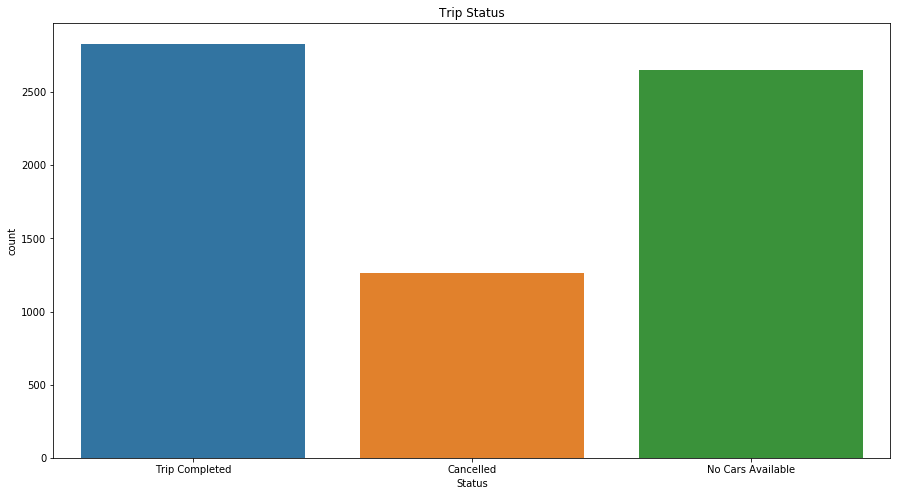

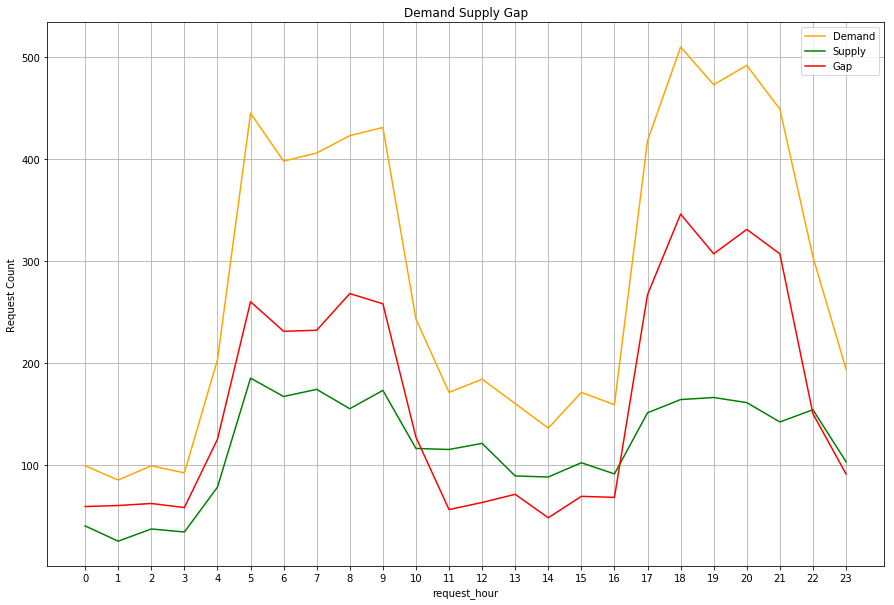

In [6]:
############################ Lets check the difference between Demand and Supply per day #####################################

# count of unique dates/days in the dataframe
no_of_days = uber_df['request_date'].nunique()

# Total Demand per day
print("Total Demand Per Day:",uber_df['Request id'].nunique()/no_of_days)

# Total number of Drivers
print("Total Number of Drivers:",uber_df['Driver id'].nunique())

# Trips completed per day
print("Trips Completed per day:",uber_df[(uber_df['Status'] == 'Trip Completed')].shape[0]/no_of_days)

# Average trips requested per driver per day
print("Avg Trips requested per driver:",(uber_df['Request id'].nunique()/no_of_days)/uber_df['Driver id'].nunique())

# Average trips completed per driver per day (huge difference between avg trips completed per driver vs avg trips requested)
print("Avg Trips completed per driver:",(uber_df[(uber_df['Status'] == 'Trip Completed')].shape[0]/no_of_days)/uber_df['Driver id'].nunique())

# plot to visualise the frequency of requests that get cancelled or show 'no cars available along with the requests completed
plt.figure(figsize=(15,8))
plt.title('Trip Status')
sns.countplot(uber_df['Status'])

################################### Plot to show Demand Supply Gap ################################################
fig, ax = plt.subplots(figsize=(15,10))
plt.xticks([hours for hours in range(0,24)])
uber_df.groupby(uber_df['request_hour']).count() ['Request id'].plot(ax=ax, label='Demand',c='orange')
uber_df[uber_df['Status']=="Trip Completed"].groupby(uber_df[uber_df['Status']=="Trip Completed"]['request_hour']).count()['Request id'].plot(ax=ax, label='Supply',c='green')
(uber_df.groupby(uber_df['request_hour']).count()['Request id'] - uber_df[uber_df['Status']=="Trip Completed"].groupby(uber_df[uber_df['Status']=="Trip Completed"]['request_hour']).count()['Request id']).plot(ax=ax, label='Gap', c='red')
plt.ylabel("Request Count")
plt.grid("on")
plt.title("Demand Supply Gap")
plt.legend()

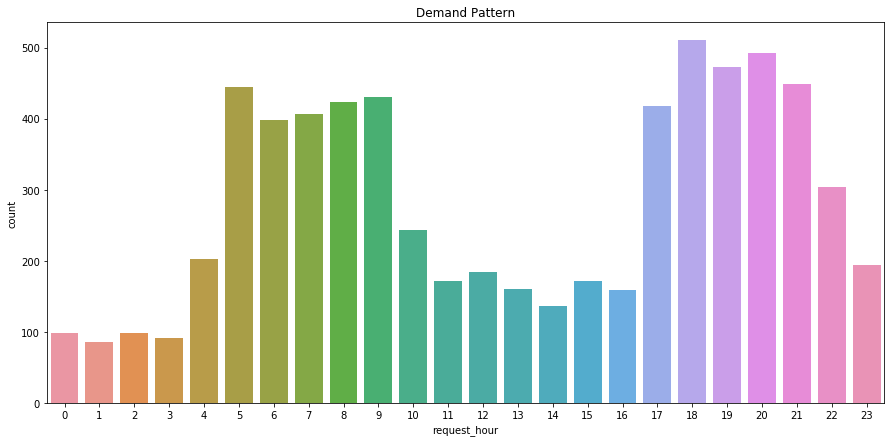

In [7]:
# Demand pattern per hour in a day
fig, ax = plt.subplots(figsize=(15,7))
plt.title('Demand Pattern')
sns.countplot(x = uber_df['request_hour'],data = uber_df)

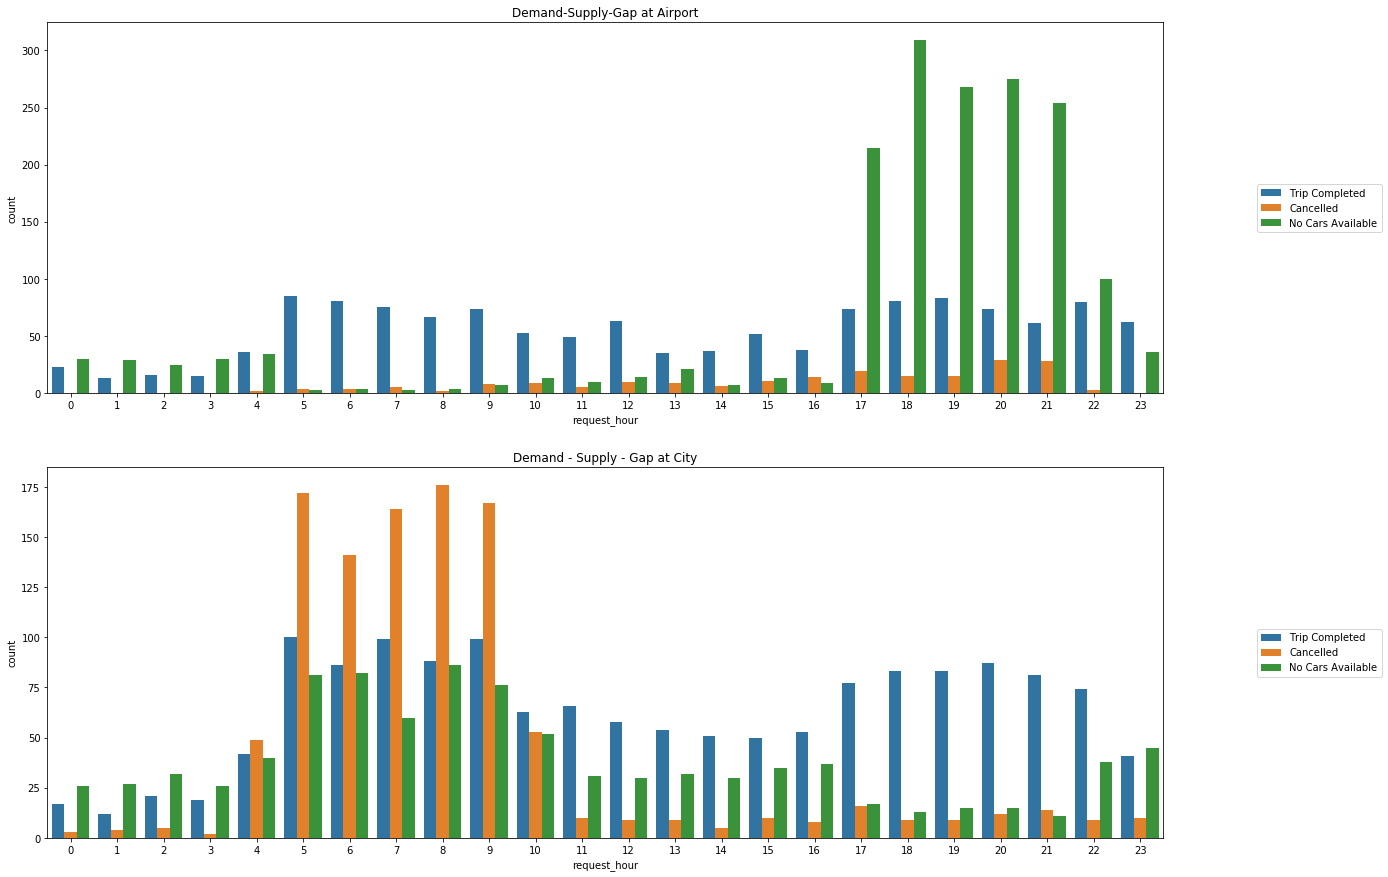

In [8]:
# Frequency of trips completed, cancelled or no cars available at Airport & City, hour wise
plt.figure(figsize=(20,15))
plt.subplot(2, 1, 1)
plt.title('Demand-Supply-Gap at Airport')
sns.countplot(x = 'request_hour', hue = 'Status', data = uber_df[(uber_df['Pickup point'] == "Airport")])
plt.legend(bbox_to_anchor=(1.20, 0.5), loc='right')
plt.subplot(2, 1, 2)
plt.title('Demand - Supply - Gap at City')
sns.countplot(x = 'request_hour', hue= 'Status', data = uber_df[(uber_df['Pickup point'] == "City")])
plt.legend(bbox_to_anchor=(1.20, 0.5), loc='right')
plt.show()

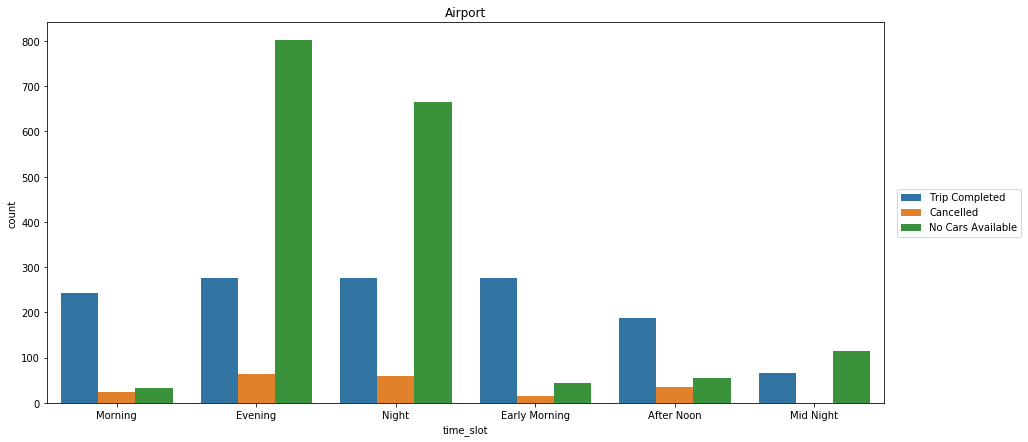

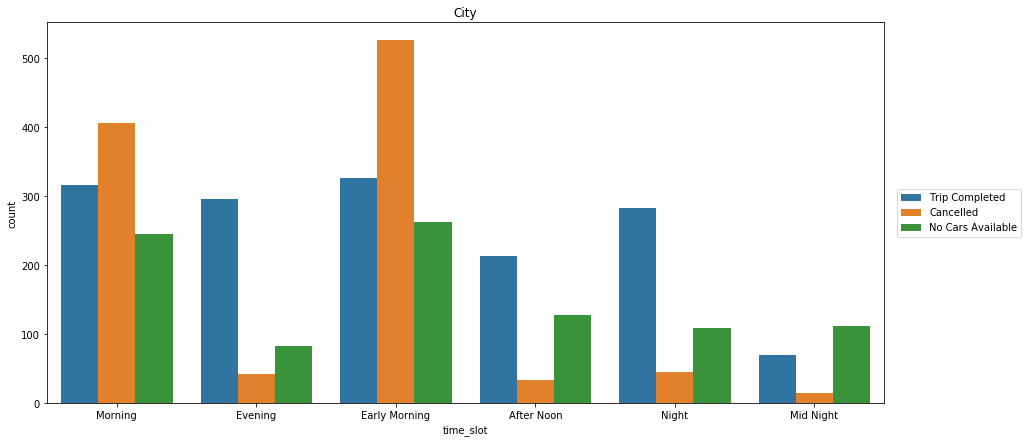

In [25]:
# Frequency of trips completed, cancelled or no cars available at Airport & City, time slot wise
# 00:00:00-3:59:59  --> Mid Night
# 04:00:00-7:59:59  --> Early Morning
# 08:00:00-11:59:59 --> Morning
# 12:00:00-15:59:59 --> After noon
# 16:00:00-19:59:59 --> Evening
# 20:00:00-23:59:59 --> Night

# Convert request_hour column to int
uber_df['request_hour'] = uber_df['request_hour'].astype(int)

# Create derived column "time_slot" from "request_hour" column
uber_df.loc[(uber_df['request_hour'] < 4),'time_slot'] = 'Mid Night'
uber_df.loc[(uber_df['request_hour'] >= 4) & (uber_df['request_hour']  < 8),  'time_slot'] = 'Early Morning'
uber_df.loc[(uber_df['request_hour'] >= 8) & (uber_df['request_hour']  < 12), 'time_slot'] = 'Morning'
uber_df.loc[(uber_df['request_hour'] >= 12) & (uber_df['request_hour'] < 16), 'time_slot'] = 'After Noon'
uber_df.loc[(uber_df['request_hour'] >= 16) & (uber_df['request_hour'] < 20), 'time_slot'] = 'Evening'
uber_df.loc[(uber_df['request_hour'] >= 20) & (uber_df['request_hour'] < 24), 'time_slot'] = 'Night'

# Demand Supply Gap at Airport & City during different time slots in a day
fig, ax = plt.subplots(figsize=(15,7))
plt.title("Airport")
ax = sns.countplot(x='time_slot',hue='Status',data=uber_df[(uber_df['Pickup point'] == "Airport")])
plt.legend(bbox_to_anchor=(1.17, 0.5), loc='right')

fig, ax = plt.subplots(figsize=(15,7))
plt.title("City")
ax = sns.countplot(x='time_slot',hue='Status',data=uber_df[(uber_df['Pickup point'] == "City")])
plt.legend(bbox_to_anchor=(1.17, 0.5), loc='right')

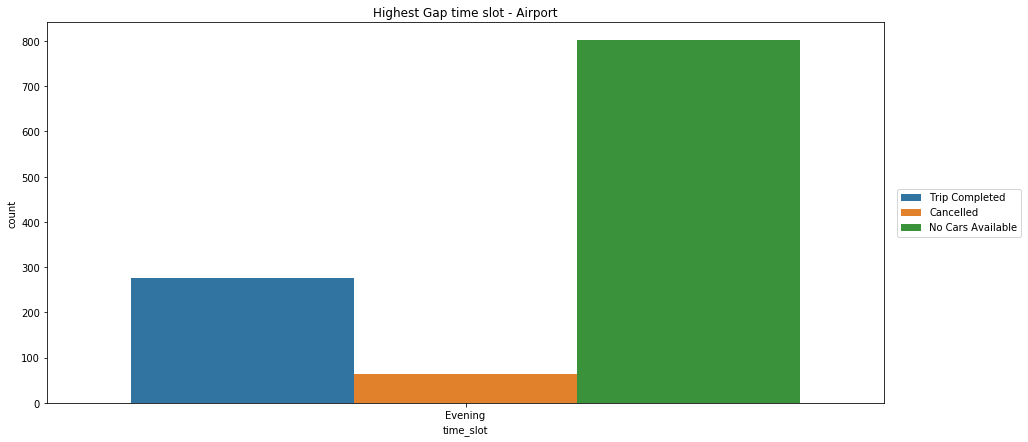

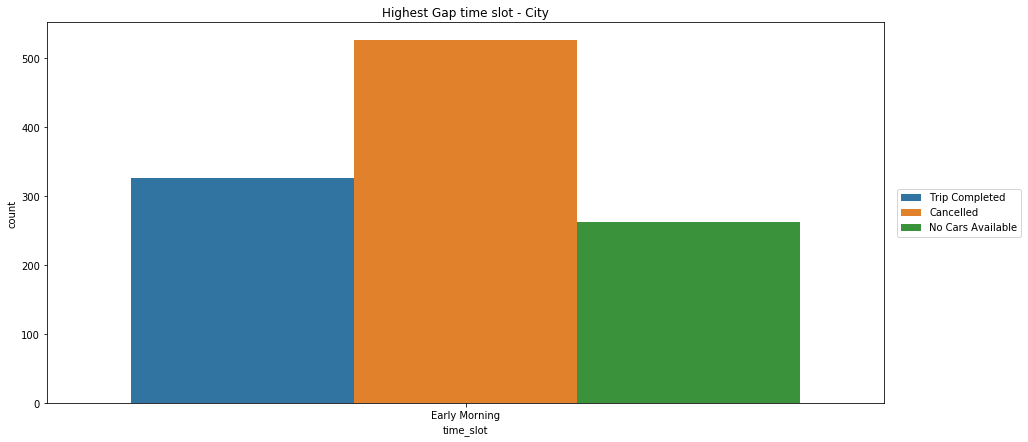

In [27]:
################################### Reasons for the Supply-Demand Gap ###################################################
uber_city = uber_df[uber_df['Pickup point']=="City"]
uber_airport = uber_df[uber_df['Pickup point']=="Airport"]

# Highest gap time slot for airport
fig, ax = plt.subplots(figsize=(15,7))
plt.title("Highest Gap time slot - Airport")
ax = sns.countplot(x='time_slot',hue='Status',data=uber_airport[(uber_airport['time_slot'] == "Evening")])
plt.legend(bbox_to_anchor=(1.17, 0.5), loc='right')

# For trips originating from the Airport, most probable reasons for such a huge Non Availability of Cars during Evening 
# and Night request time could be :
#    a) For most of the drivers, this time period is the end of their working hours thus leading to non-availability 
#       of cars at the airport. 
#    b) Frequency of flights landing after these time slots starts reducing, the wait period for the drivers waiting for
#       the passenger increases,thus they are reluctant to be at the airport at these time slots. 


# Highest gap time slot for city
fig, ax = plt.subplots(figsize=(15,7))
plt.title("Highest Gap time slot - City")
ax = sns.countplot(x='time_slot',hue='Status',data=uber_city[(uber_city['time_slot'] == "Early Morning")])
plt.legend(bbox_to_anchor=(1.17, 0.5), loc='right')
# For trips originating from the City, most probable reasons for such a huge Cancellation during Early Morning and 
# Morning request time slot could be : 
#    a) If drivers takes up a early morning or morning trip from city to airport, more likely, he will spend a lot of idle time
#       at the airport waiting for the next passenger.
#    b) Chances of more trip completion and higher earnings if choosing a trip that is not bound for airport.